In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from statistics import median,mean
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score


D:\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data=pd.read_csv('c:\\users\\DVM\\downloads\\bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
data.shape


(45211, 17)

In [5]:
data.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
data[['job','marital','default','housing','loan','contact','month','poutcome','Target']]=data[['job','marital','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [7]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,object,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [8]:
data.isna().sum

<bound method DataFrame.sum of          age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
5      False  False    False      False    False    False    False  False   
6      False  False    False      False    False    False    False  False   
7      False  False    False      False    False    False    False  False   
8      False  False    False      False    False    False    False  False   
9      False  False    False      False    False    False    False  False   
10     False  False    False      False    False    False    False  False   
11     False  False    False      False    Fa

In [9]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [10]:
data['job'].value_counts()
data['marital'].value_counts()
data['education'].value_counts()
data['default'].value_counts()
data['balance'].value_counts()
data['housing'].value_counts()
data['loan'].value_counts()
data['contact'].value_counts()
data['month'].value_counts()
data['duration'].value_counts()
data['campaign'].value_counts()
data['pdays'].value_counts()
data['previous'].value_counts()
data['poutcome'].value_counts()
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


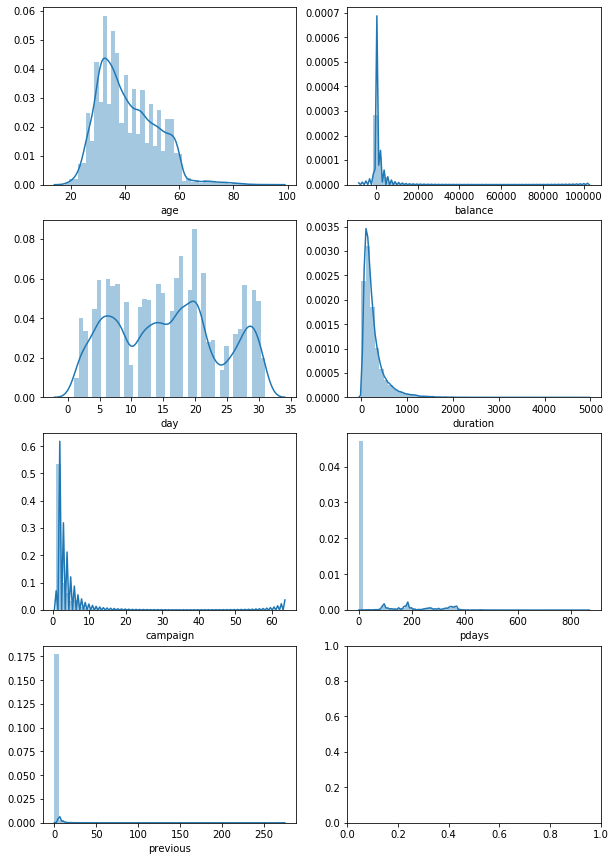

In [12]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])

<bound method Figure.show of <Figure size 720x1080 with 10 Axes>>

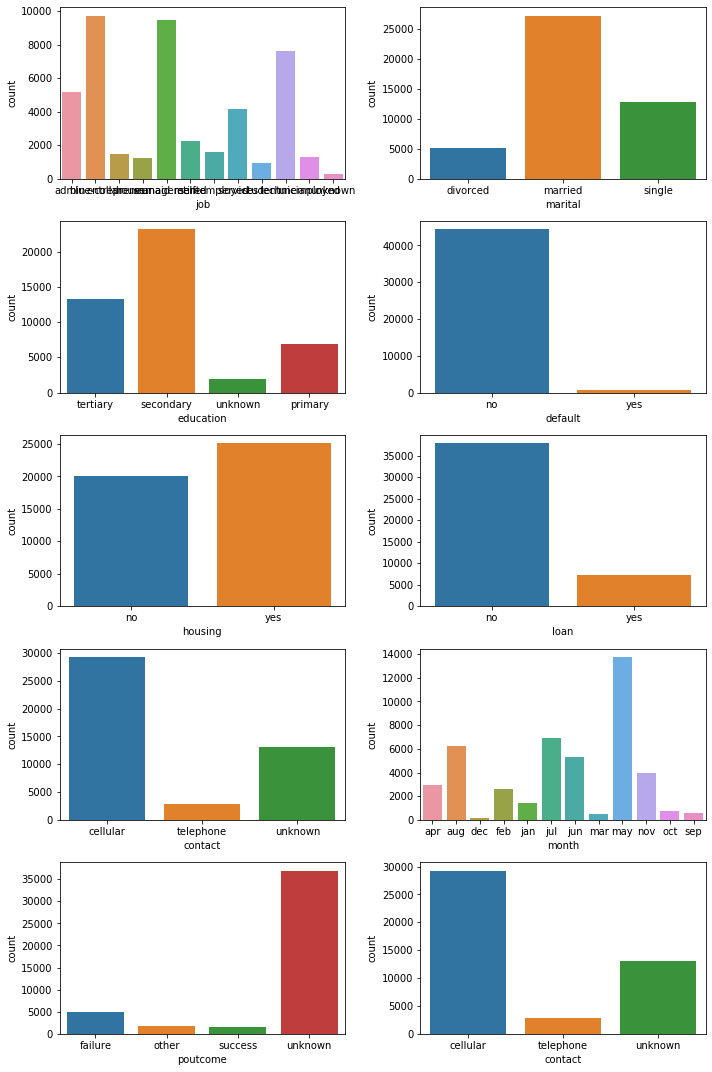

In [13]:
fig,axe=plt.subplots(nrows=5,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.countplot(x=data['job'],ax=axe[0])
#plt.setp(plt.get_figlabels,roatation=90)
sns.countplot(x=data['marital'],ax=axe[1])
sns.countplot(x=data['education'],ax=axe[2])
sns.countplot(x=data['default'],ax=axe[3])
sns.countplot(x=data['housing'],ax=axe[4])
sns.countplot(x=data['loan'],ax=axe[5])
sns.countplot(x=data['contact'],ax=axe[6])
sns.countplot(x=data['month'],ax=axe[7])
sns.countplot(x=data['poutcome'],ax=axe[8])
sns.countplot(x=data['contact'],ax=axe[9])
fig.tight_layout()
fig.show

In [14]:
data.skew().to_frame('skewness measure')

,skewness measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


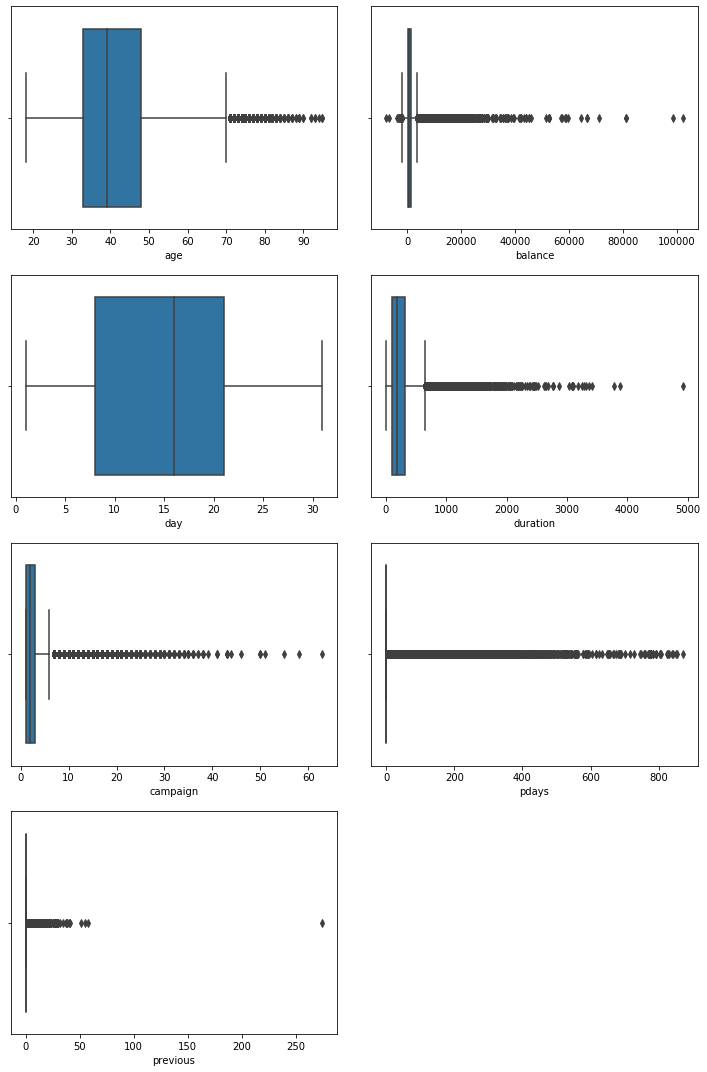

In [15]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(x='previous',data=data,ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [16]:
data['Target'].value_counts().to_frame('target feature distribution')

,target feature distribution
no,39922
yes,5289


In [17]:
df=data.copy()
le=LabelEncoder()
df['default']=le.fit_transform(df['default']).astype(int)
df['job']=le.fit_transform(df['job']).astype(int)
df['marital']=le.fit_transform(df['marital']).astype(int)
df['education']=le.fit_transform(df['education']).astype(int)
df['housing']=le.fit_transform(df['housing']).astype(int)
df['loan']=le.fit_transform(df['loan']).astype(int)
df['contact']=le.fit_transform(df['contact']).astype(int)
df['month']=le.fit_transform(df['month']).astype(int)
df['poutcome']=le.fit_transform(df['poutcome']).astype(int)
df['Target']=le.fit_transform(df['Target']).astype(int)

In [18]:
df[['job','marital','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [19]:
meanbal=float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

In [20]:
meandur=float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])

In [21]:
meancam=float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancam,df['campaign'])

In [22]:
meanpd=float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpd,df['pdays'])

In [23]:
meanpr=float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanpr,df['previous'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


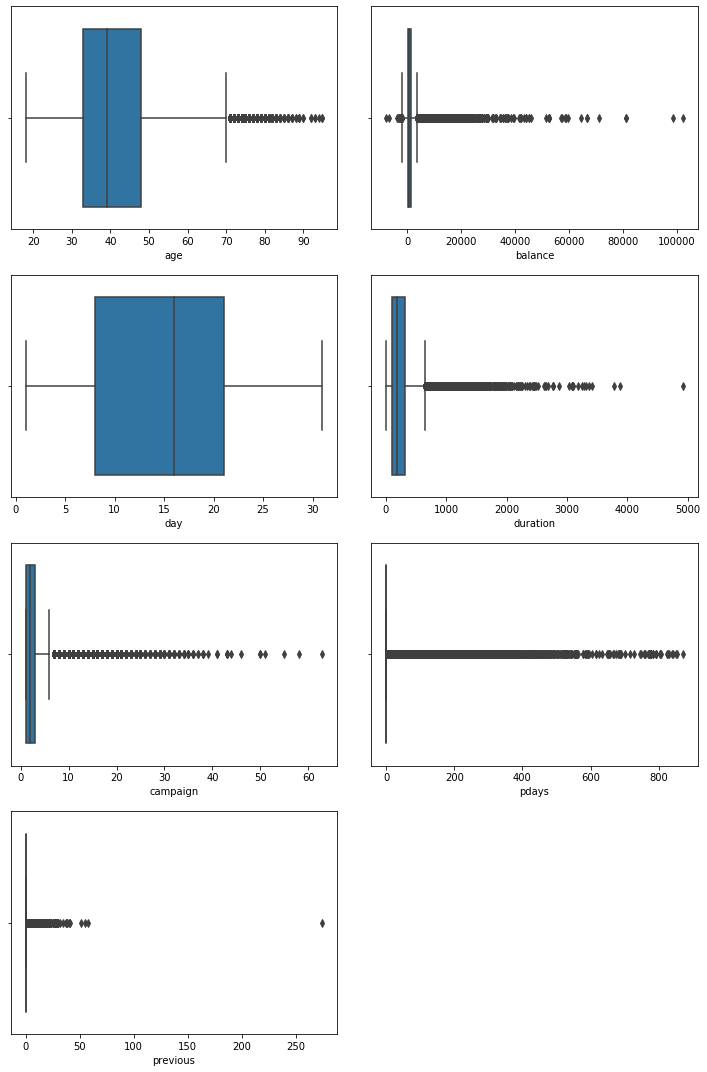

In [24]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(x='previous',data=data,ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

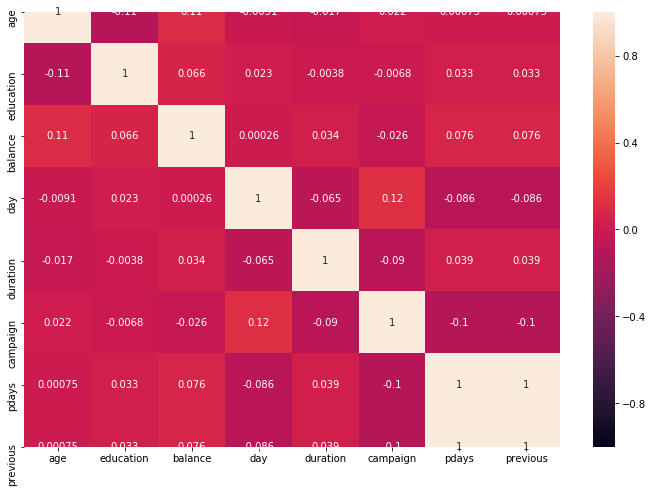

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

In [26]:
df2=df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


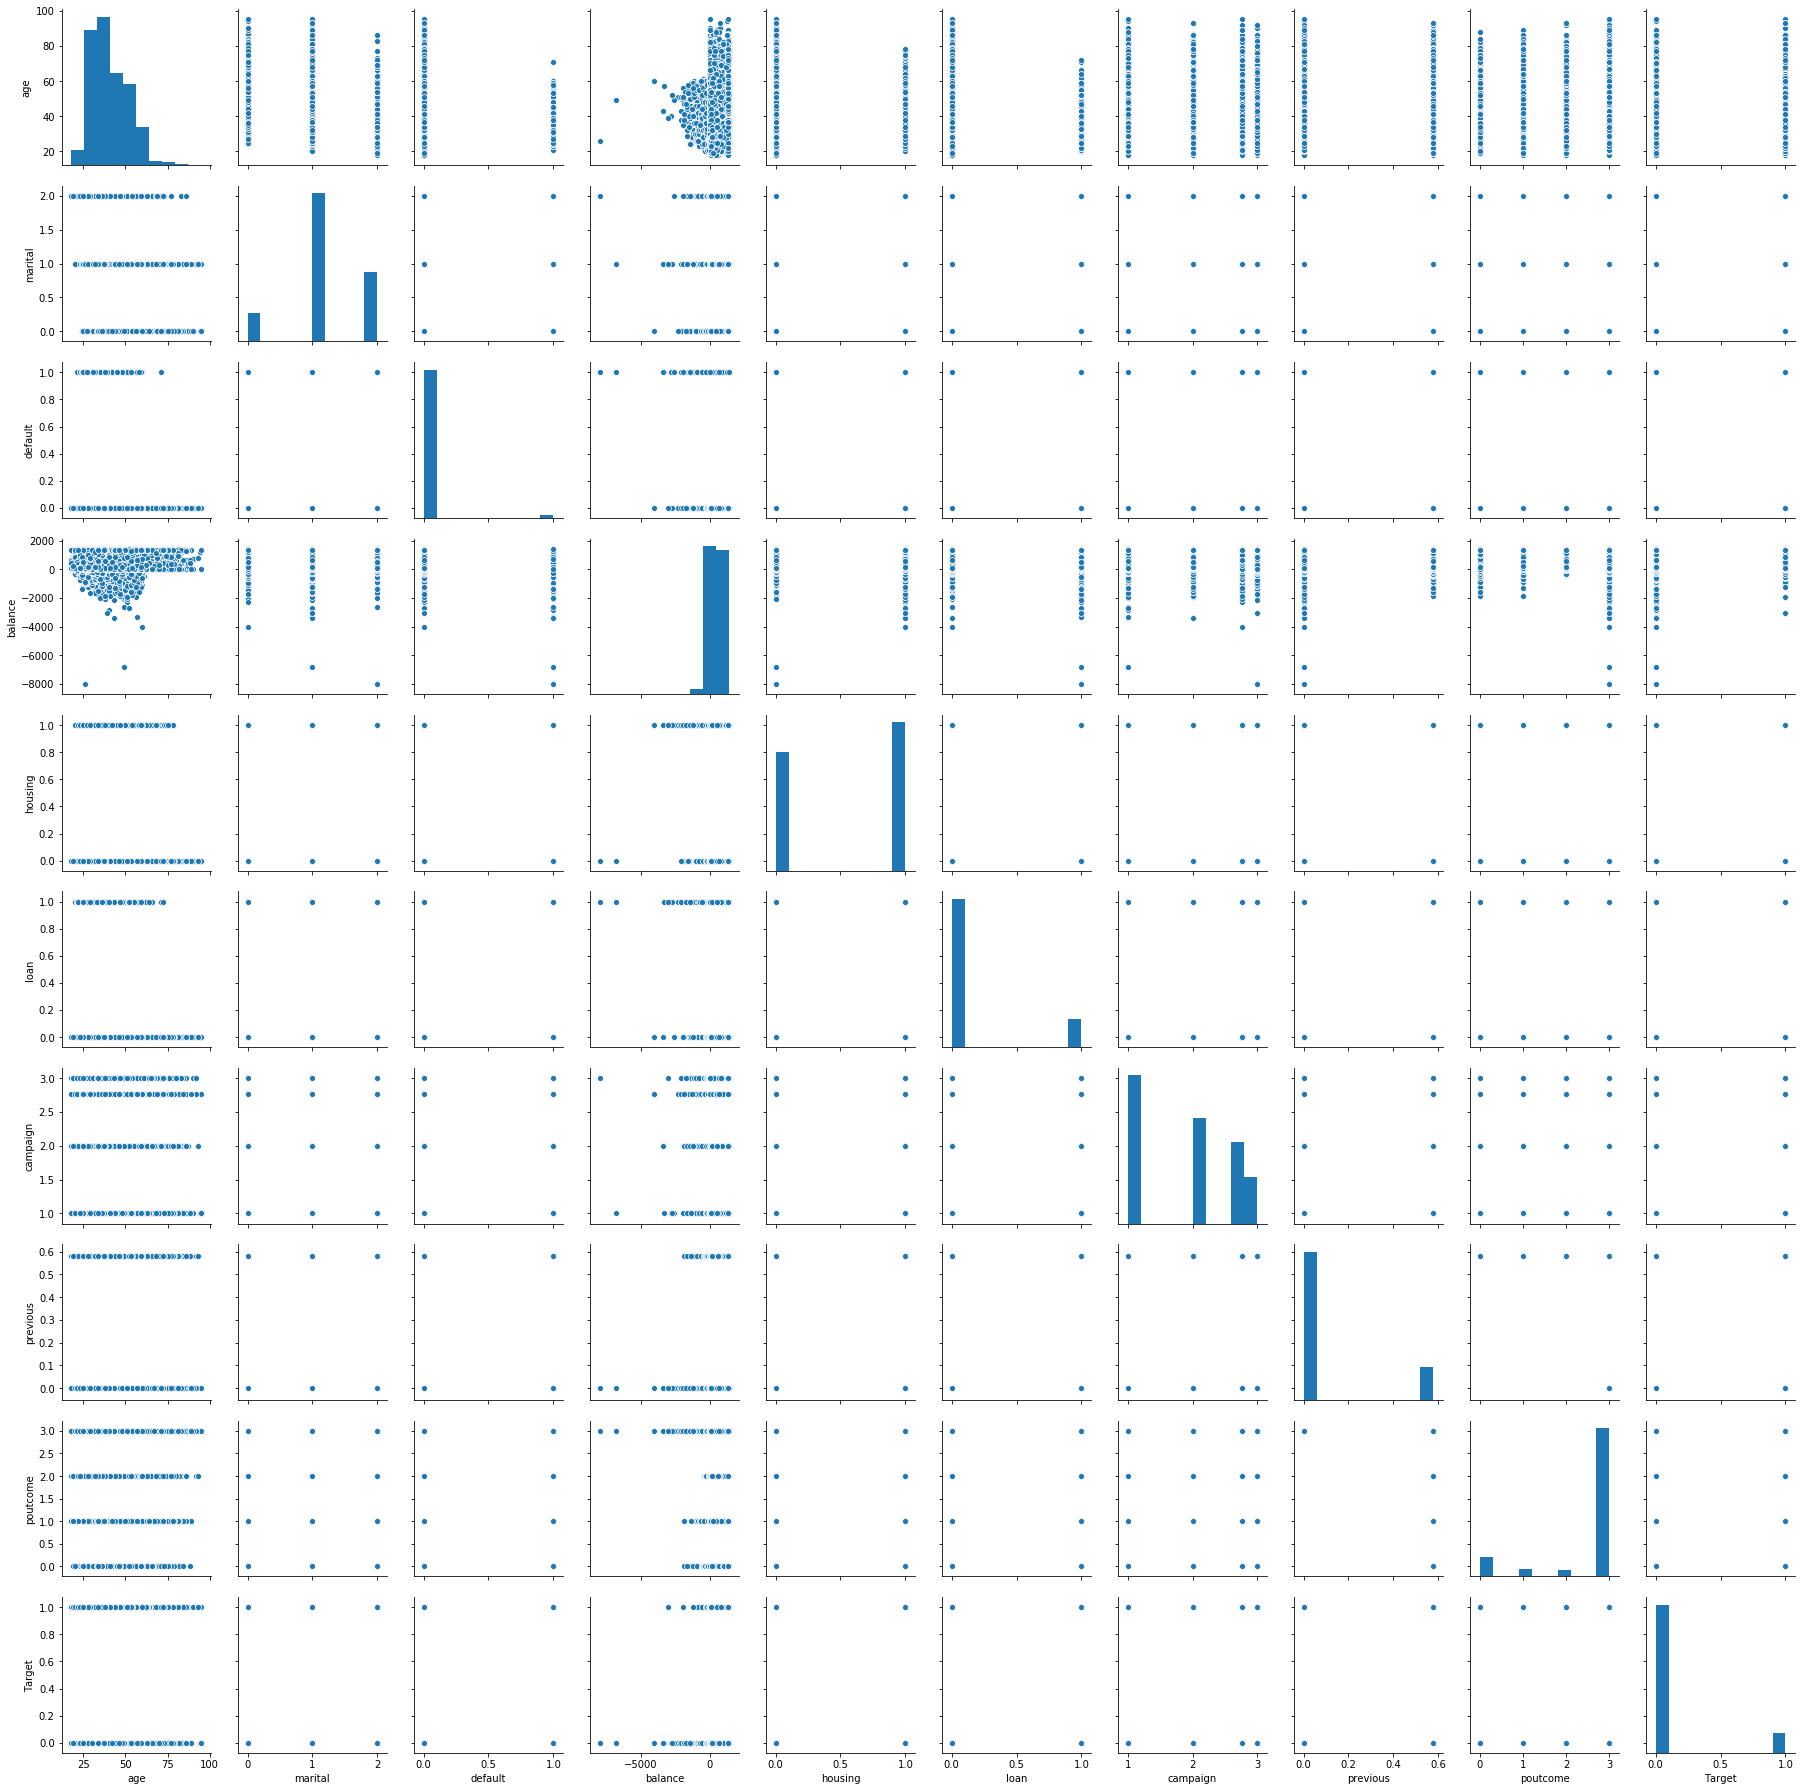

In [27]:
sns.pairplot(df2)

In [28]:
x=df2.drop('Target',axis=1)
y=df2['Target']

In [29]:
x.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=3,random_state=2)

In [32]:
df2.dtypes

age            int64
marital     category
default     category
balance      float64
housing     category
loan        category
campaign     float64
previous     float64
poutcome    category
Target      category
dtype: object

In [33]:
scale=StandardScaler()
xtrain_scaled=scale.fit_transform(xtrain)
xtest_scaled=scale.fit_transform(xtest)

In [34]:
logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,ytrain)
y_pred=logic_r.predict(xtest_scaled)
LR_accuracy=accuracy_score(ytest,y_pred)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,y_pred))
print('\naccuracy score\n',LR_accuracy*100)
print('\nclassification report\n\n',classification_report(ytest,y_pred))


confusion matrix

 [[3]]

accuracy score
 100.0

classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [35]:
NB=GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predi=NB.predict(xtest_scaled)
NB_accuracy=accuracy_score(ytest,y_predi)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,y_predi))
print('\n accuracy score\n',NB_accuracy*100)
print('\nclassification report',classification_report(ytest,y_predi))


confusion matrix

 [[3]]

 accuracy score
 100.0

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [36]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(xtrain_scaled,ytrain)
y_predic=KNN.predict(xtest_scaled)
KNN_accuracy=accuracy_score(ytest,y_predic)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,y_predic))
print('\n accuracy score\n',KNN_accuracy*100)
print('\nclassification report',classification_report(ytest,y_predic))


confusion matrix

 [[2 1]
 [0 0]]

 accuracy score
 66.66666666666666

classification report               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [37]:
svc=SVC()
svc.fit(xtrain_scaled,ytrain)
y_predict=svc.predict(xtest_scaled)
svc_accuracy=accuracy_score(ytest,y_predict)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,y_predict))
print('\n accuracy score\n',svc_accuracy*100)
print('\nclassification report',classification_report(ytest,y_predict))


confusion matrix

 [[3]]

 accuracy score
 100.0

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [38]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dtree_predict=dtree.predict(xtest_scaled)
dtree_accuracy=accuracy_score(ytest,dtree_predict)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,dtree_predict))
print('\n accuracy score\n',dtree_accuracy*100)
print('\nclassification report',classification_report(ytest,dtree_predict))


confusion matrix

 [[2 1]
 [0 0]]

 accuracy score
 66.66666666666666

classification report               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [41]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=500,random_state=1)
bagc.fit(xtrain_scaled,ytrain)
bag_predict=bagc.predict(xtest_scaled)
BAG_accuracy=accuracy_score(ytest,bag_predict)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,bag_predict))
print('\n accuracy score\n',BAG_accuracy*100)
print('\nclassification report',classification_report(ytest,bag_predict))


confusion matrix

 [[2 1]
 [0 0]]

 accuracy score
 66.66666666666666


D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



classification report               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



In [52]:
adab=AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(xtrain,ytrain)
ada_predict=adab.predict(xtest_scaled)
ADA_accuracy=accuracy_score(ytest,ada_predict)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,ada_predict))
print('\n accuracy score\n',ADA_accuracy*100)
print('\nclassification report',classification_report(ytest,ada_predict))


confusion matrix

 [[3]]

 accuracy score
 100.0

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [53]:
randf=RandomForestClassifier(n_estimators=100,random_state=2,max_features=3)
randf.fit(xtrain_scaled,ytrain)
ran_predict=randf.predict(xtest_scaled)
RAN_accuracy=accuracy_score(ytest,ran_predict)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,ran_predict))
print('\n accuracy score\n',RAN_accuracy*100)
print('\nclassification report',classification_report(ytest,ran_predict))


confusion matrix

 [[2 1]
 [0 0]]

 accuracy score
 66.66666666666666

classification report               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [54]:
grad=GradientBoostingClassifier(n_estimators=100,random_state=2)
grad.fit(xtrain_scaled,ytrain)
grad_predict=grad.predict(xtest_scaled)
GRAD_accuracy=accuracy_score(ytest,grad_predict)
print('\nconfusion matrix\n\n',confusion_matrix(ytest,grad_predict))
print('\n accuracy score\n',GRAD_accuracy*100)
print('\nclassification report',classification_report(ytest,grad_predict))


confusion matrix

 [[3]]

 accuracy score
 100.0

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [55]:
score=[('Naive Bayes',NB_accuracy),('KNN',KNN_accuracy),('logisticregression',LR_accuracy),('SVC',svc_accuracy),('desicion tree',DT_accuracy),('bagging',BAG_accuracy),('Adaptive Boosting',ADA_accuracy),('Gradient boosting',GRAD_accuracy),('Random forest',RAN_accuracy)]

In [56]:
score

[('Naive Bayes', 1.0),
 ('KNN', 0.6666666666666666),
 ('logisticregression', 1.0),
 ('SVC', 1.0),
 ('desicion tree', 0.6666666666666666),
 ('bagging', 0.6666666666666666),
 ('Adaptive Boosting', 1.0),
 ('Gradient boosting', 1.0),
 ('Random forest', 0.6666666666666666)]